<h2 align="center">بِسْمِ اللهِ الرَّحْمٰنِ الرَّحِيمِ</h2>
<h4 align="center"><i>In the name of Allah, the Most Gracious, the Most Merciful</i></h4>


# 🎓 Project Title: **Car Price Prediction**
### 🧩 Algorithm: *Multiple Linear Regression*
---

**Objective:**  
To predict car prices based on multiple features such as horsepower, engine size, mileage, and more.

**Tools Used:**  
- Python 🐍  
- Pandas, NumPy, Matplotlib  
- Scikit-learn and more  


| Property            | Description                                               |
| ------------------- | --------------------------------------------------------- |
| **Dataset Name**    | Car Price Prediction Dataset                              |
| **Total Records**   | 205 cars                                                  |
| **Total Features**  | 26 attributes                                             |
| **Target Variable** | `price`                                                   |
| **Goal**            | To predict the price of a car based on its specifications |


# 🛠️ Production Environment Setup

In [3]:
 #🛠️ Advanced imports for production ML

# Suppress warnings for cleaner outputs
import warnings
warnings.filterwarnings('ignore')

# 🔧 Core Python libraries
import numpy as np           # Efficient numerical computations
import pandas as pd          # Data manipulation and analysis
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns        # Advanced visualization
from scipy import stats      # Statistical functions
import joblib               # Save/load large models and preprocessing objects
import json                 # Handle JSON configs and outputs
from datetime import datetime  # Timestamping for logs
import os                   # File system operations
import time                 # Time tracking for experiments



# 🧰 Sklearn libraries - expanded for advanced ML workflows

from sklearn.model_selection import (
    train_test_split,     # Split data into train/test sets
    cross_val_score,      # Cross-validation scoring
    GridSearchCV,         # Hyperparameter tuning (grid search)
    RandomizedSearchCV    # Hyperparameter tuning (randomized search)
)
from sklearn.preprocessing import (
    StandardScaler,       # Feature scaling (zero-mean, unit variance)
    RobustScaler,         # Scaling robust to outliers
    PolynomialFeatures    # Generate polynomial features for non-linear relationships
)
from sklearn.pipeline import Pipeline, FeatureUnion  # Build modular pipelines
from sklearn.compose import ColumnTransformer         # Apply different preprocessing to columns
from sklearn.feature_selection import (
    SelectKBest,          # Univariate feature selection
    f_regression,         # Scoring function for regression
    RFE                   # Recursive feature elimination
)
from sklearn.linear_model import (
    LinearRegression,     # Baseline regression
    Ridge,                # L2-regularized regression
    Lasso,                # L1-regularized regression
    ElasticNet            # Combination of L1 and L2 regularization
)
from sklearn.ensemble import (
    RandomForestRegressor,       # Ensemble of decision trees
    GradientBoostingRegressor,   # Boosted trees for regression
    VotingRegressor              # Combine multiple regressors
)
from sklearn.svm import SVR               # Support Vector Regression
from sklearn.metrics import (
    mean_squared_error,  # Regression metric
    r2_score,            # Regression metric
    mean_absolute_error  # Regression metric
)
from sklearn.inspection import (
    permutation_importance,       # Feature importance
    PartialDependenceDisplay      # Partial dependence plots
)

# 🧪 Advanced model tracking with MLflow
import mlflow                  # Experiment tracking
import mlflow.sklearn          # Log sklearn models
from mlflow.models.signature import infer_signature  # Auto-capture input/output schema for reproducible deployment

# 🎛️ Configuration & Reproducibility

Before we start modeling, it’s crucial to **establish reproducible and scalable experiment settings**. This ensures that results are consistent, experiments are traceable, and your workflow is production-ready.


In [4]:
import os
import mlflow

class Config:
    # Reproducibility
    RANDOM_STATE = 42
    TEST_SIZE = 0.2
    VAL_SIZE = 0.2
    CV_FOLDS = 5
    N_JOBS = -1  # Use all CPU cores

    # Model & experiment directories
    MODEL_DIR = "models"
    EXPERIMENT_DIR = "experiments"

    # Ensure directories exist
    os.makedirs(MODEL_DIR, exist_ok=True)
    os.makedirs(EXPERIMENT_DIR, exist_ok=True)

# ✅ Create config object
config = Config()

# ✅ Use plain absolute path (no "file://" prefix — Windows fix)
mlflow.set_tracking_uri(f"file:///{os.path.abspath(config.EXPERIMENT_DIR).replace('\\', '/')}")


# ✅ Define or get experiment
experiment_name = "Car_Price_Prediction "
mlflow.set_experiment(experiment_name)

print(f"✅ MLflow tracking URI set to: {os.path.abspath(config.EXPERIMENT_DIR)}")
print(f"✅ Using experiment: {experiment_name}")

✅ MLflow tracking URI set to: c:\Users\pc\OneDrive\Desktop\github M.mohamed\SAIR\Regression\regressionproject\experiments
✅ Using experiment: Car_Price_Prediction 


# Part 2️⃣:  Dataset — Car Price Prediction 

The Car Price Prediction dataset contains information about different car models and their characteristics.
It is used to analyze which factors most influence the price of a car.

## 📋 Dataset Features

| Feature      | Type             | Description                                 |
| ------------ | ---------------- | ------------------------------------------- |
| `CarName`    | Categorical      | Name of the car model                       |
| `fueltype`   | Categorical      | Type of fuel — *gas* or *diesel*            |
| `carbody`    | Categorical      | Type of car body (e.g., sedan, hatchback)   |
| `drivewheel` | Categorical      | Type of driving wheel — *fwd*, *rwd*, *4wd* |
| `enginesize` | Numeric          | Engine capacity in cc                       |
| `horsepower` | Numeric          | Power output of the engine                  |
| `curbweight` | Numeric          | Car’s total weight without passengers       |
| `citympg`    | Numeric          | Mileage in city driving                     |
| `highwaympg` | Numeric          | Mileage on highways                         |
| `price`      | Numeric (Target) | Selling price of the car                    |



## 🔍 Step 1: Loading the data

# Lets load the dataset (the bad way)


In [5]:
# Load the dataset
data_praice = "C:/Users/pc/OneDrive/Desktop/car project/CarPrice_Assignment.csv"
df = pd.read_csv(data_praice)

# ✅ Define the target variable (the value we want to predict)
target_col = 'price'
features_df = df.drop(columns=[target_col])
target_series = df[target_col]

# dataframe
df_clean = features_df.copy()
df_clean['Price'] = target_series # Add the target column again

# 📣 Print results and information
print(f"✅  Dataset loaded successfully!")
print(f"Shape (Shape): {df_clean.shape}")
print(f"(Features): {list(features_df.columns)}")
print(f"\nFirst 5 rows of the clean dataset:")
print(df_clean.head(5))

✅  Dataset loaded successfully!
Shape (Shape): (205, 26)
(Features): ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

First 5 rows of the clean dataset:
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \


In [6]:
# 📦 Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# ✅ 1. Load your dataset
# Put here the correct path to your CSV file
data_praice = "C:/Users/pc/OneDrive/Desktop/car project/CarPrice_Assignment.csv"
df = pd.read_csv(data_praice)

# ✅ 2. Check the structure of the dataset
print("✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}\n")

# ✅ 3. Define the target column (the value we want to predict)
target_col = 'price'   # 'price' is the target column

features_df = df.drop(columns=[target_col])
# 'price'
target_series = df[target_col]


# ✅ 4. Define the feature columns (all columns except the target)
#X = df.drop(columns=[target_col])  # all columns except 'price'
#y = df[target_col]                 # only the target column

print("🎯 Target column:", target_col)
print("🧩 Feature columns:", list(features_df.columns))
print("\n✅ Features and target defined successfully!")

# ✅ 5. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features_df, target_series, test_size=0.2, random_state=42
)
# ✅ 6. Create a clean DataFrame with features + target together (for display or export)
df_clean = pd.DataFrame(df.drop(columns=[target_col]))  # copy all input features
df_clean['Price'] = df[target_col]  # add target as the last column

print("\n🧾 Cleaned dataset preview:")
print(df_clean.head())


print("\n📊 Data successfully split!")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
# 🔍 Quick overview of the data
print("📋 Dataset Info:")
print(df.info())
print("\n📊 Statistical Summary:")
print(df.describe())
print("\n🔹 First 5 rows:")
df.head(30)



✅ Dataset loaded successfully!
Shape: (205, 26)
Columns: ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

🎯 Target column: price
🧩 Feature columns: ['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

✅ Features and target defined successfully!

🧾 Cleaned dataset preview:
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        st

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


## 🔍 Step 2: Exploratory Data Analysis (EDA)

Before building models, we must **understand our data**:
- Check for missing values
- Understand distributions
- Detect outliers
- Explore relationships between features

In [7]:
# Basic statistics
print("=" * 70)
print("📊 DATASET STATISTICS")
print("=" * 70)
print(df.describe())



📊 DATASET STATISTICS
           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   

In [8]:
# Missing values check
print("\n" + "=" * 70)
print("🔍 MISSING VALUES CHECK")
print("=" * 70)
print(df.isnull().sum())


🔍 MISSING VALUES CHECK
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


## 📋  Checking Data Types Matters

Before building models, it’s crucial to understand the **data types** of each feature.

1. **Model Compatibility:**  
   - Most ML models require **numerical input** (float or int).  


3. **Data Cleaning & Transformation:**  
   - Knowing types helps decide preprocessing steps:
     - Scaling numerical features
     - Encoding categorical variables
     - Handling dates or strings

In [9]:
# Data types
print("\n" + "=" * 70)
print("📋 DATA TYPES")
print("=" * 70)
print(df.dtypes)


📋 DATA TYPES
car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


- Encoding categorical variables

In [19]:
from sklearn.preprocessing import OneHotEncoder
df_types = df.copy()
# Detect categorical columns
categorical_cols = df_types.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df_types.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("\nCategorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)

# Preprocessing with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_cols)
    ]
)

# Transform the dataset
df_prepared = preprocessor.fit_transform(df_types)
print("\n✅ Dataset ready for modeling:")
print("Shape after encoding:", df_prepared.shape)



Categorical columns: ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
Numeric columns: ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

✅ Dataset ready for modeling:
Shape after encoding: (205, 191)


In [54]:

df_types = df.copy()
# ✅ Identify categorical and numeric columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(exclude=['object']).columns.tolist()

# ✅ Create and apply OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))

# ✅ Rename encoded columns
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# ✅ Combine numeric and encoded categorical columns
df_encoded = pd.concat([df[numeric_cols].reset_index(drop=True),
                        X_encoded.reset_index(drop=True)], axis=1)

print("✅ Data successfully encoded!")
print(f"New shape: {df_encoded.shape}")
print(df_encoded.head())


✅ Data successfully encoded!
New shape: (205, 191)
   car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0       1          3       88.6      168.8      64.1       48.8        2548   
1       2          3       88.6      168.8      64.1       48.8        2548   
2       3          1       94.5      171.2      65.5       52.4        2823   
3       4          2       99.8      176.6      66.2       54.3        2337   
4       5          2       99.4      176.6      66.4       54.3        2824   

   enginesize  boreratio  stroke  ...  cylindernumber_three  \
0         130       3.47    2.68  ...                   0.0   
1         130       3.47    2.68  ...                   0.0   
2         152       2.68    3.47  ...                   0.0   
3         109       3.19    3.40  ...                   0.0   
4         136       3.19    3.40  ...                   0.0   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                    0.0      

In [56]:
print(df_encoded.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Columns: 191 entries, car_ID to fuelsystem_spfi
dtypes: float64(183), int64(8)
memory usage: 306.0 KB
None


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [20]:
# ✅ Identify numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

print("📊 Numeric columns:", numeric_cols)

# ✅ Basic statistical overview
print("\n📈 Summary statistics:")
print(df[numeric_cols].describe())

📊 Numeric columns: ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

📈 Summary statistics:
           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  eng

## 🗑️ Feature Dropping


In [57]:
df_clean = df.copy()
df_clean = df_clean.drop(columns=['car_ID', 'CarName'], errors='ignore')
print("✅ Columns after dropping:", list(df_clean.columns))


✅ Columns after dropping: ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


⚙️ (Plot Setup)
📊(Histograms)
📦 (Boxplots)

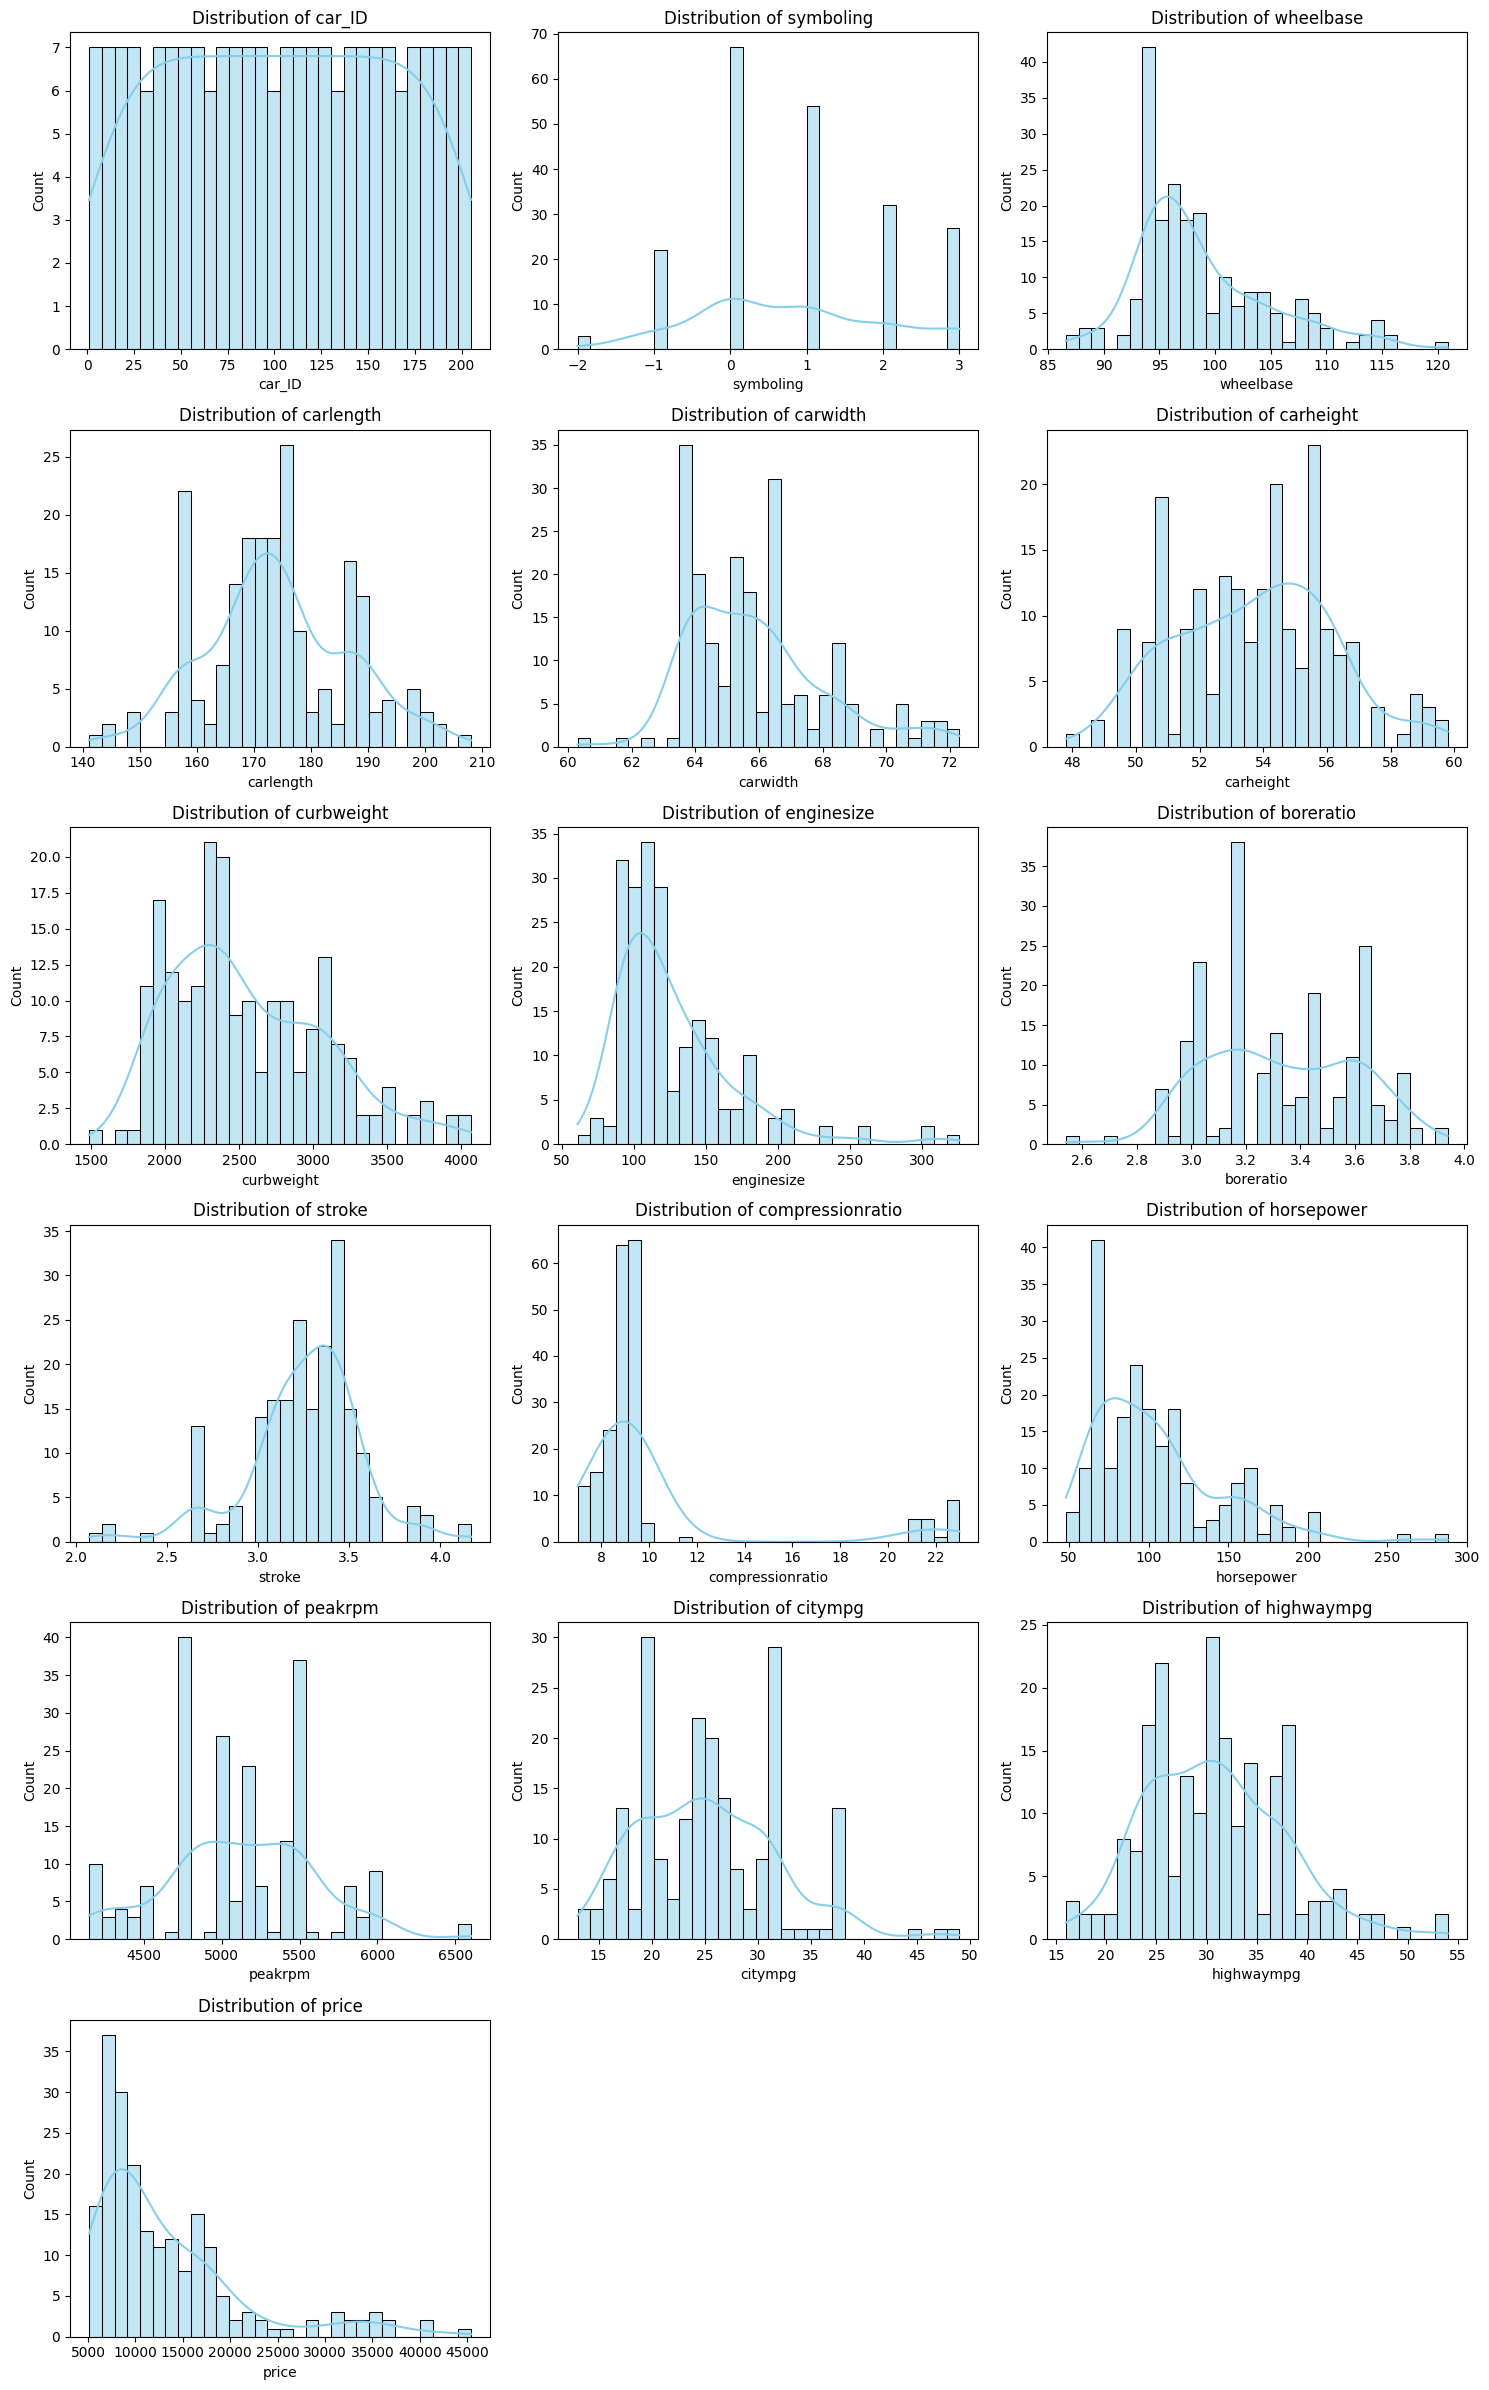

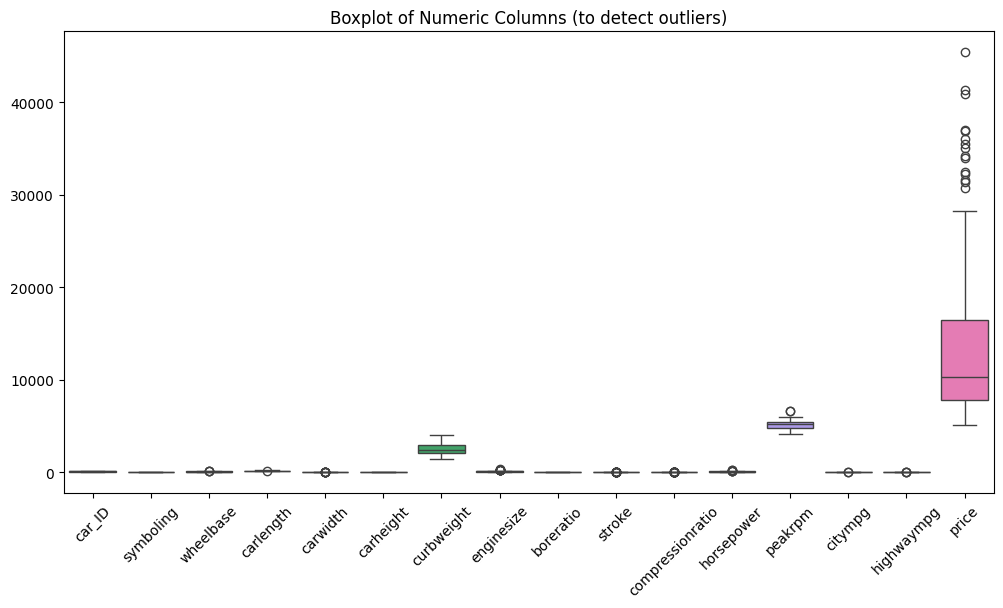

In [13]:
# Distribution visualizations

# ✅ Plot histograms for all numeric columns
import math
n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

plt.figure(figsize=(15, 4 * n_rows))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# ✅ Optional: Boxplots to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot of Numeric Columns (to detect outliers)")
plt.xticks(rotation=45)
plt.show()

# 🧠  Feature Engineering and 🏗️ Building the Final Preprocessing Pipeline
## 🚀`AdvancedFeatureEngineer` Class


💡 **Pro Tip:** Turning feature engineering into a reusable transformer is a **best practice in production ML** — it allows you to deploy exactly the same transformation logic during training and inference, ensuring consistency.




In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# =================================================================
# 1. Custom Classes Definition
# =================================================================

# NOTE: Ensure these classes are fully defined in your environment.
class AdvancedFeatureEngineer:
    """Creates six new domain-driven features based on car physics."""
    def __init__(self):
        self.feature_names = ['horsepower', 'curbweight', 'enginesize', 'citympg', 'highwaympg', 'wheelbase']
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_eng = X.copy()
        # Col Indices: 0=HP, 1=CurbWeight, 2=EngineSize, 3=CityMPG, 4=HighwayMPG, 5=Wheelbase
        X_eng = np.column_stack([
            X_eng,
            X_eng[:, 0] / (X_eng[:, 1] + 1e-8),  # PowerToWeight
            X_eng[:, 2] / (X_eng[:, 1] + 1e-8),  # EngineToWeight
            (X_eng[:, 3] + X_eng[:, 4]) / 2,     # AvgMPG
            ((X_eng[:, 3] + X_eng[:, 4]) / 2) / (X_eng[:, 0] + 1e-8), # MPGperHP
            X_eng[:, 0] * X_eng[:, 2],           # PowerXEngine
            X_eng[:, 5] / (X_eng[:, 1] + 1e-8)   # WheelbaseToWeight
        ])
        return X_eng

class OutlierHandler:
    def __init__(self, factor=1.5):
        self.factor = factor
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X # Placeholder - place your actual outlier logic here

# =================================================================
# 2. Data Loading and Initial Cleaning (Resolving the TypeError)
# =================================================================

# ✅ 2.1 Load your dataset (using your specified path)
data_path = "C:/Users/pc/OneDrive/Desktop/car project/CarPrice_Assignment.csv"
try:
    df = pd.read_csv(data_path)
    print("✅ Dataset loaded successfully.")
except FileNotFoundError:
    print(f"❌ Error: File not found at path: {data_path}")
    exit()

target_col = 'price'
NUMERIC_FEATURES_FOR_ENGINEERING = [
    'horsepower', 'curbweight', 'enginesize', 
    'citympg', 'highwaympg', 'wheelbase'
]

# ⛔️ CRITICAL STEP: Type conversion to prevent TypeError ⛔️
print("🔄 Applying forced cleaning on numeric columns...")
for col in NUMERIC_FEATURES_FOR_ENGINEERING:
    # Initial cleanup of string/object types (e.g., remove units or commas)
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.replace('HP', '').str.replace(',', '').str.strip()
    
    # Forced conversion: Failure turns into NaN (which the Imputer will handle later)
    df[col] = pd.to_numeric(df[col], errors='coerce') 

print("✅ Data types cleaned and converted.")

# =================================================================
# 3. Feature Separation and Data Splitting
# =================================================================

# 3.1 Separate features from the target
features_df = df.drop(columns=[target_col])
target_series = df[target_col]

# 3.2 Split the data
X_train, X_test, y_train, y_test = train_test_split(
    features_df, target_series, test_size=0.2, random_state=42
)

# 3.3 Identify column lists based on the training data types
X_train_numeric = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
X_train_categorical = X_train.select_dtypes(include=['object']).columns.tolist()

# Define the specific lists for the ColumnTransformer
numerical_cols_for_fe = [col for col in X_train_numeric if col in NUMERIC_FEATURES_FOR_ENGINEERING]
remaining_numeric_cols = [col for col in X_train_numeric if col not in NUMERIC_FEATURES_FOR_ENGINEERING]

# =================================================================
# 4. Building the Comprehensive Preprocessing Pipeline
# =================================================================

# 4.1 Feature Engineering (FE) Pipeline
fe_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),        # Fills NaNs (from the forced conversion)
    ('feature_engineer', AdvancedFeatureEngineer()),    # Applies FE (now safe)
    ('outlier_handler', OutlierHandler(factor=1.5)), 
    ('scaler', RobustScaler())                    
])

# 4.2 Other Numerical Features Pipeline (No FE)
other_num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', RobustScaler())
])

# 4.3 Categorical Features Pipeline
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first'))
])

# 4.4 Combine all pipelines using ColumnTransformer 
preprocessor = ColumnTransformer(
    transformers=[
        ('fe_pipe', fe_pipeline, numerical_cols_for_fe), 
        ('other_num', other_num_pipe, remaining_numeric_cols), 
        ('cat_pipe', categorical_pipeline, X_train_categorical) 
    ],
    remainder='drop' # Drops any column not explicitly listed
)

# =================================================================
# 5. Applying the Pipeline to the Data
# =================================================================

print("\n🔄 Applying the comprehensive preprocessing pipeline...")

# Apply fit_transform to training data
X_train_processed = preprocessor.fit_transform(X_train)

# Apply transform (only) to test data
X_test_processed = preprocessor.transform(X_test)

print("\n✅ PREPROCESSING COMPLETED SUCCESSFULLY!")
print(f"📊 Training set final shape (Processed Data): {X_train_processed.shape}")

✅ Dataset loaded successfully.
🔄 Applying forced cleaning on numeric columns...
✅ Data types cleaned and converted.

🔄 Applying the comprehensive preprocessing pipeline...

✅ PREPROCESSING COMPLETED SUCCESSFULLY!
📊 Training set final shape (Processed Data): (164, 172)


## 🧭 Outlier Handling with IQR — Making the Data More Robust

### 🧮 IQR Outlier Detection Logic

For each feature:

1. Calculate **Q1 (25th percentile)** and **Q3 (75th percentile)**.
2. Compute **IQR = Q3 − Q1**.
3. Define:
   $$
   \text{Lower Bound} = Q1 - 1.5 \times IQR
   \quad
   \text{Upper Bound} = Q3 + 1.5 \times IQR
   $$
4. Clip any values outside this range to make the distribution **more stable**.

✅ **Why this matters:**

* Stabilizes scaling
* Reduces the influence of extreme values
* Keeps the data intact (no row deletion)
* Makes the pipeline more production-ready



In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

# NEW: Outlier Handler for Robust Models
class OutlierHandler(BaseEstimator, TransformerMixin):
    """Handle outliers using IQR method - More robust than simple scaling"""
    
    def __init__(self, factor=1.5):
        self.factor = factor
        self.lower_bounds_ = None
        self.upper_bounds_ = None
    
    def fit(self, X, y=None):
        self.lower_bounds_ = []
        self.upper_bounds_ = []
        
        # Calculate IQR bounds for each feature
        for i in range(X.shape[1]):
            Q1 = np.percentile(X[:, i], 25)  # 25th percentile
            Q3 = np.percentile(X[:, i], 75)  # 75th percentile  
            IQR = Q3 - Q1  # Interquartile Range
            self.lower_bounds_.append(Q1 - self.factor * IQR)
            self.upper_bounds_.append(Q3 + self.factor * IQR)
        
        return self
    
    def transform(self, X):
        X_transformed = X.copy()
        # Clip values to IQR bounds
        for i in range(X.shape[1]):
            lower = self.lower_bounds_[i]
            upper = self.upper_bounds_[i]
            X_transformed[:, i] = np.clip(X_transformed[:, i], lower, upper)
        
        return X_transformed

📊 Distribution Analysis
Understanding feature distributions helps us:

- Identify data skewness and outliers

- Guide preprocessing decisions (scaling, transformations)

- Understand the nature of each feature

- Detect potential data quality issues

## 📊 Correlation Analysis

Understanding feature correlations helps us:
- Identify the most important features
- Detect multicollinearity
- Guide feature engineering

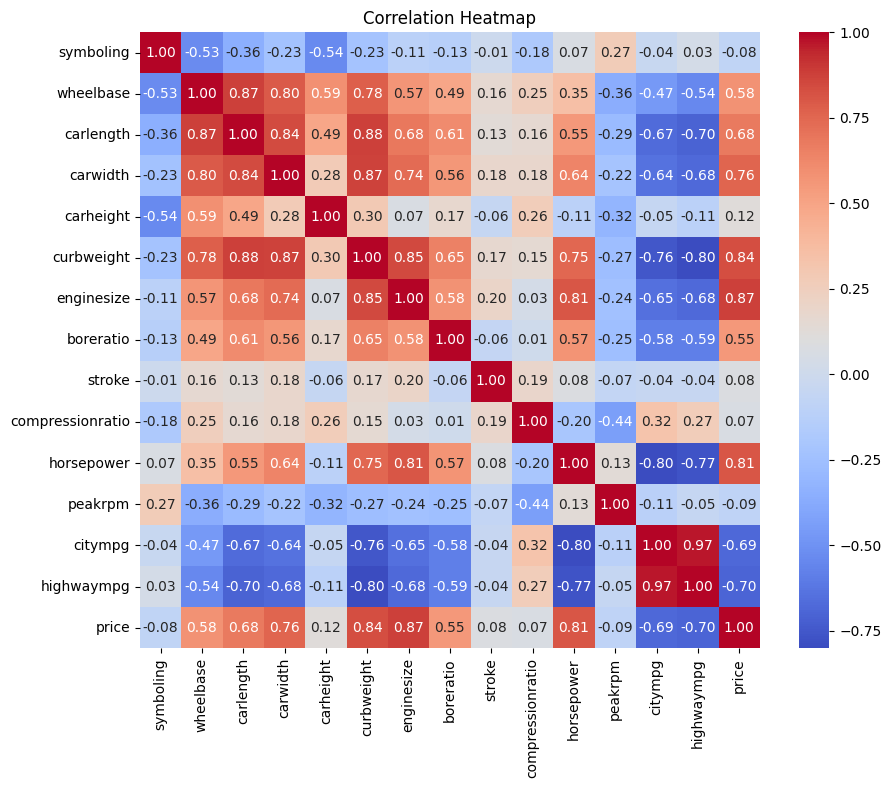

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_clean.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## 🆕 Better Approach: Train / Validation / Test Split
This separation ensures:

* ✅ Cleaner model evaluation
* ✅ More reliable hyperparameter tuning
* ✅ Reduced overfitting to the test set
* ✅ More realistic production performance estimation

---


> 💡 **Pro Tip:** Keeping the **test set locked away** until the final step is a good MLOps practice — it gives you the clearest picture of real-world performance.

## 🧱 Implementation:

In [33]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# --- Assumed Predefined Constants (Add these if not already defined) ---
TEST_SIZE = 0.2     # Example: 20% of total data goes to the final test set
VAL_SIZE_RATIO = 0.25 # Example: 25% of the *remaining* data (80%) goes to validation (which is 20% of total)
RANDOM_STATE = 42

# --- Assumed Input Data (replace with your actual data variables) ---
# X_features_and_target = pd.DataFrame(...) # Your combined data
# X = X_features_and_target.drop(columns=['price'])
# y = X_features_and_target['price']


# 1. Initial Split: Separate the Test Set
# X_temp holds the remaining data (Train + Validation)
X_temp, X_test, y_temp, y_test = train_test_split(
    features_df, target_series, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE
)

# 2. Second Split: Separate the Validation Set from the temporary set
# The test_size here is calculated as a fraction of X_temp
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, 
    test_size=VAL_SIZE_RATIO, 
    random_state=RANDOM_STATE
)

# --- Verification and Summary ---

print(f"\n📊 DATA SPLITS (Improved to include Validation Set):")
print(f"• Training Set: {X_train.shape[0]:,} samples (Model Learning)")
print(f"• Validation Set: {X_val.shape[0]:,} samples (Hyperparameter Tuning)") 
print(f"• Test Set: {X_test.shape[0]:,} samples (Final Evaluation)")


📊 DATA SPLITS (Improved to include Validation Set):
• Training Set: 123 samples (Model Learning)
• Validation Set: 41 samples (Hyperparameter Tuning)
• Test Set: 41 samples (Final Evaluation)


## 🆕 Introducing Advanced Models

We now upgrade our model set to include a **diverse mix of linear, regularized, tree-based, and ensemble learners**:

| Model Name                     | Type                  | Why We Add It 🧭                                                    |
| ------------------------------ | --------------------- | ------------------------------------------------------------------- |
| `LinearRegression`             | Linear Baseline       | A clean baseline — interpretable and fast.                          |
| `Ridge Regression`             | Regularized Linear    | Controls overfitting with L2 regularization.                        |
| `Lasso Regression`             | Regularized Linear    | Performs **feature selection** via L1 penalty.                      |
| `ElasticNet` 🆕                | Hybrid Regularization | Combines L1 + L2 — more flexible for correlated features.           |
| `RandomForestRegressor` 🆕     | Tree Ensemble         | Handles nonlinearities & interactions without feature engineering.  |
| `GradientBoostingRegressor` 🆕 | Boosting Ensemble     | Learns sequentially, improving weak learners over time.             |
| `Support Vector Regression` 🆕 | Kernel Method         | Captures complex relationships using kernel tricks.                 |
| `VotingRegressor` 🆕           | Ensemble Strategy     | Combines multiple models for **stronger, more stable performance**. |

---

## ⚡ Why This Matters in Production

✅ **Model diversity** improves your chances of finding a high-performing model.
✅ **Regularized models** give stability and interpretability.
✅ **Ensemble methods** usually outperform single models in complex tasks.
✅ **Nonlinear models** can capture patterns linear models miss.

This setup also makes it easy to:

* 📊 Compare models consistently
* 🧪 Run hyperparameter tuning later
* 🧠 Blend models into a **final ensemble**

---

## 🧱 Implementation

In [34]:
# define advanced models - Expanded from previous work
from sklearn.linear_model import Ridge

advanced_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=config.RANDOM_STATE),
    'Lasso Regression': Lasso(random_state=config.RANDOM_STATE),
    'ElasticNet': ElasticNet(random_state=config.RANDOM_STATE),  # NEW: Combines L1 + L2
    'Random Forest': RandomForestRegressor(random_state=config.RANDOM_STATE, n_jobs=config.N_JOBS),
    'Gradient Boosting': GradientBoostingRegressor(random_state=config.RANDOM_STATE),  # NEW: Sequential learning
    'Support Vector Regression': SVR(),  # NEW: Different approach
}

# NEW: Voting Ensemble - Combines multiple models
voting_ensemble = VotingRegressor([
    ('ridge', Ridge(random_state=config.RANDOM_STATE)),
    ('rf', RandomForestRegressor(random_state=config.RANDOM_STATE, n_jobs=config.N_JOBS)),
    ('gb', GradientBoostingRegressor(random_state=config.RANDOM_STATE))
])

advanced_models['Voting Ensemble'] = voting_ensemble

print(f"\n🎯 MODEL PORTFOLIO ({len(advanced_models)} models):")


🎯 MODEL PORTFOLIO (8 models):



## 🧹Step-by-Step lets build the model training and logging with mlflow 
# Helper 1: Basic Training & Evaluation
This helper focuses only on:

training the model,

predicting on both train and validation sets, and

calculating key metrics (RMSE, R², MAE, training time, overfitting gap).


In [35]:
# ===========================
# 📦 Helper 1 — Basic training and evaluation
# ===========================
def train_and_evaluate(model, X_train, y_train, X_val, y_val):
    """Train model and compute basic metrics on train and validation sets."""
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    metrics = {
        "train_rmse": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "val_rmse": np.sqrt(mean_squared_error(y_val, y_val_pred)),
        "train_r2": r2_score(y_train, y_train_pred),
        "val_r2": r2_score(y_val, y_val_pred),
        "train_mae": mean_absolute_error(y_train, y_train_pred),
        "val_mae": mean_absolute_error(y_val, y_val_pred),
        "training_time": training_time,
        "overfitting_gap": r2_score(y_train, y_train_pred) - r2_score(y_val, y_val_pred)
    }

    return metrics, model

# Helper 2: Cross-Validation

It evaluates how well a model generalizes to **unseen data** using **cross-validation** — instead of just relying on a single train–validation split.


In [36]:
# ===========================
# 📦 Helper 2 — Cross-validation
# ===========================
def compute_cross_validation(model, X_train, y_train, cv_folds=config.CV_FOLDS):
    """Run cross-validation and return mean and std of R² scores."""
    cv_scores = cross_val_score(model, X_train, y_train,
                                cv=cv_folds, scoring='r2', n_jobs=config.N_JOBS)
    return cv_scores.mean(), cv_scores.std()

### 📦 Helper 3 — MLflow Logging


In [37]:
# ===========================
# 📦 Helper 3 — MLflow Logging
# ===========================
def log_to_mlflow(model, metrics, cv_mean, cv_std, run_name):
    """Log params, metrics, and model to MLflow in a clean, minimal way."""
    with mlflow.start_run(run_name=run_name):
        # 1. Log hyperparameters
        mlflow.log_params(model.get_params())
        
        # 2. Log main metrics
        for k, v in metrics.items():
            if k != 'training_time':  # avoid logging long times directly
                mlflow.log_metric(k, float(v))
        mlflow.log_metric("cv_r2_mean", float(cv_mean))
        mlflow.log_metric("cv_r2_std", float(cv_std))
        
        # 3. Save model artifact
        mlflow.sklearn.log_model(model, "model")



### 🚀 Advanced Model Evaluation

This function combines the full evaluation workflow into a **clean, easy-to-follow step**:

1. **Train & Evaluate** → fits the model and computes metrics on both training and validation sets.
2. **Cross-Validation** → estimates robust performance and stability using k-fold splits.
3. **MLflow Logging** → tracks hyperparameters, metrics, and saves the model artifact for reproducibility.

> ✅ With this structure, you get **all key insights and tracking** without cluttering your main training loop.


In [38]:
def evaluate_model_advanced(model, X_train, X_val, y_train, y_val, model_name):
    """Train, evaluate, cross-validate, and log model in a clean step-by-step way."""
    # 1. Train and evaluate
    metrics, trained_model = train_and_evaluate(model, X_train, y_train, X_val, y_val)
    
    # 2. Cross-validation
    cv_mean, cv_std = compute_cross_validation(model, X_train, y_train)
    metrics["cv_r2_mean"] = cv_mean
    metrics["cv_r2_std"] = cv_std
    
    # 3. Log everything to MLflow
    log_to_mlflow(model, metrics, cv_mean, cv_std, model_name)
    
    return metrics, trained_model

In [62]:
# ✅ استخدمي البيانات المرمّزة بدلاً من الأصلية
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# الآن درّبي النموذج باستخدام X و y


In [64]:
# ✅ 1. Prepare the dataset (make sure 'df' is your original DataFrame)
df_clean = df.copy()

# Drop unnecessary columns
df_clean = df_clean.drop(columns=['car_ID', 'CarName'], errors='ignore')

# Separate target variable (price)
y = df_clean['price']
X = df_clean.drop(columns=['price'])

# ✅ 2. Encode categorical columns
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X.select_dtypes(exclude=['object']).columns.tolist()

encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]))

X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# ✅ 3. Combine numeric and encoded categorical data
X_final = pd.concat([X[numeric_cols].reset_index(drop=True),
                     X_encoded.reset_index(drop=True)], axis=1)

print("✅ Data encoded and ready for ML training!")
print("Shape:", X_final.shape)
print("All numeric? ->", X_final.dtypes.unique())

# ✅ 4. Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)

print("\n📊 Train shape:", X_train.shape)
print("📊 Validation shape:", X_val.shape)


✅ Data encoded and ready for ML training!
Shape: (205, 43)
All numeric? -> [dtype('int64') dtype('float64')]

📊 Train shape: (164, 43)
📊 Validation shape: (41, 43)


In [65]:
def evaluate_model_advanced(model, X_train, X_val, y_train, y_val, model_name):
    """Comprehensive model evaluation with MLflow tracking"""
    
    # Start MLflow run for experiment tracking
    with mlflow.start_run(run_name=model_name):
        # Train model with timing
        start_time = time.time()
        model.fit(X_train, y_train)
        training_time = time.time() - start_time
        
        # Predictions on both sets
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        
        # Calculate comprehensive metrics
        metrics = {
            'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
            'val_rmse': np.sqrt(mean_squared_error(y_val, y_val_pred)),
            'train_r2': r2_score(y_train, y_train_pred),
            'val_r2': r2_score(y_val, y_val_pred),
            'train_mae': mean_absolute_error(y_train, y_train_pred),
            'val_mae': mean_absolute_error(y_val, y_val_pred),
            'training_time': training_time,
            'overfitting_gap': r2_score(y_train, y_train_pred) - r2_score(y_val, y_val_pred)
        }
        
        # AUTOMATIC TRACKING with MLflow
        mlflow.log_params(model.get_params())  # Log hyperparameters
        mlflow.log_metrics({k: v for k, v in metrics.items() if k != 'training_time'})
        mlflow.sklearn.log_model(model, "model")  # Save model artifact
        
        # Cross-validation for robust performance estimate
        cv_scores = cross_val_score(model, X_train, y_train, 
                                  cv=config.CV_FOLDS, scoring='r2', n_jobs=config.N_JOBS)
        metrics['cv_r2_mean'] = cv_scores.mean()
        metrics['cv_r2_std'] = cv_scores.std()
        
        mlflow.log_metrics({
            'cv_r2_mean': metrics['cv_r2_mean'],
            'cv_r2_std': metrics['cv_r2_std']
        })
        
        return metrics, model

print("🚀 STARTING ADVANCED MODEL EVALUATION...")
print("Each model is being trained, evaluated, and tracked in MLflow")

results = {}
trained_models = {}

for name, model in advanced_models.items():
    print(f"\n🔧 Training {name}...")
    metrics, trained_model = evaluate_model_advanced(
        model, X_train, X_val, y_train, y_val, name
    )
    results[name] = metrics
    trained_models[name] = trained_model
    
    # Progress reporting
    overfitting_indicator = "⚠️" if metrics['overfitting_gap'] > 0.1 else "✅"
    print(f"✅ {name:20} | Val R²: {metrics['val_r2']:.4f} | "
          f"CV R²: {metrics['cv_r2_mean']:.4f} ± {metrics['cv_r2_std']:.4f} "
          f"{overfitting_indicator}")

print(f"\n📈 All models trained and tracked in MLflow!")
print(f"💡 Check MLflow UI: mlflow ui --backend-store-uri {config.EXPERIMENT_DIR}")

2025/11/11 22:47:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


🚀 STARTING ADVANCED MODEL EVALUATION...
Each model is being trained, evaluated, and tracked in MLflow

🔧 Training Linear_Regression...


2025/11/11 22:47:10 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/11 22:47:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Linear_Regression    | Val R²: 0.8926 | CV R²: 0.8329 ± 0.0868 ✅

🔧 Training Random_Forest...


2025/11/11 22:47:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/11 22:47:15 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/11 22:47:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Random_Forest        | Val R²: 0.9580 | CV R²: 0.8904 ± 0.0600 ✅

📈 All models trained and tracked in MLflow!
💡 Check MLflow UI: mlflow ui --backend-store-uri ./mlruns


In [59]:
non_numeric = df_clean.select_dtypes(include=['object']).columns
print("الأعمدة غير الرقمية:", non_numeric.tolist())


الأعمدة غير الرقمية: ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [48]:
print(df_clean.head())


   symboling fueltype aspiration doornumber      carbody drivewheel  \
0          3      gas        std        two  convertible        rwd   
1          3      gas        std        two  convertible        rwd   
2          1      gas        std        two    hatchback        rwd   
3          2      gas        std       four        sedan        fwd   
4          2      gas        std       four        sedan        4wd   

  enginelocation  wheelbase  carlength  carwidth  ...  enginesize  fuelsystem  \
0          front       88.6      168.8      64.1  ...         130        mpfi   
1          front       88.6      168.8      64.1  ...         130        mpfi   
2          front       94.5      171.2      65.5  ...         152        mpfi   
3          front       99.8      176.6      66.2  ...         109        mpfi   
4          front       99.4      176.6      66.4  ...         136        mpfi   

  boreratio stroke  compressionratio horsepower  peakrpm  citympg  highwaympg  \
0    

In [49]:
df.isnull().sum()


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [60]:
# ✅ استخدمي البيانات المرمّزة بدلاً من الأصلية
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# الآن درّبي النموذج باستخدام X و y


## 📊 Model Comparison & Visualization

In this section, we summarize and visualize the performance of all trained models. 

- First, we convert the `results` dictionary into a readable table.  
- Then, we create simple plots for key metrics to help interpret model performance:

1. **Validation R²** → Higher is better ✅  
2. **Validation RMSE** → Lower is better ✅  
3. **Overfitting Gap** → Closer to 0 is better ⚖️  

These visualizations make it easy for both technical and non-technical users to compare models at a glance.

📊 Model comparison table:


,Model,val_r2,val_rmse,val_mae,overfitting_gap,cv_r2_mean
0,Linear Regression,0.861003,2447.984829,1733.527835,0.007557,0.833931
1,Ridge Regression,0.867175,2393.021915,1747.827834,-0.054952,0.762991
2,Lasso Regression,0.861288,2445.477415,1732.406963,0.007256,0.832537
3,ElasticNet,0.761149,3209.004932,2339.232543,-0.019493,0.718133
4,Random Forest,0.877643,2296.792497,1529.771429,0.107655,0.859966
5,Gradient Boosting,0.881147,2263.663619,1578.194951,0.114026,0.855141
6,Support Vector Regression,0.002753,6557.041116,4820.883876,-0.089902,-0.103057
7,Voting Ensemble,0.893688,2140.903710,1418.935045,0.071604,0.863983


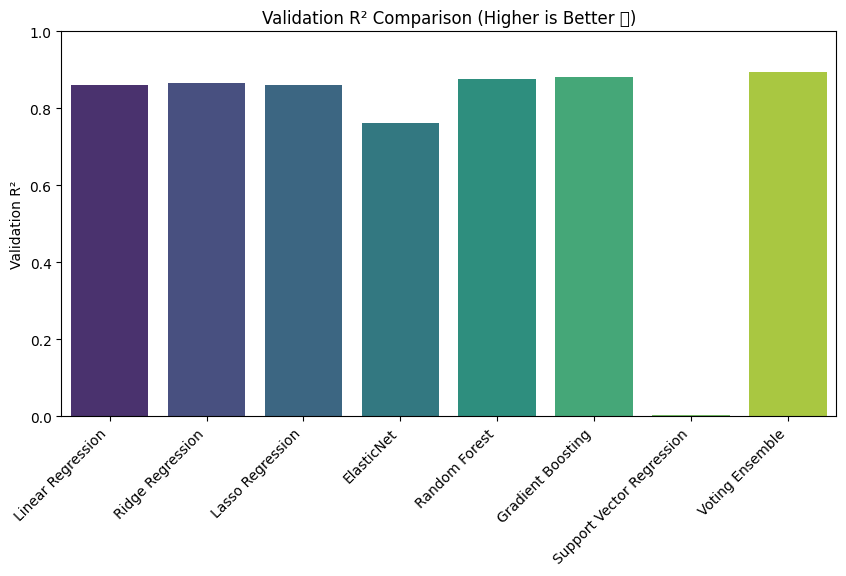

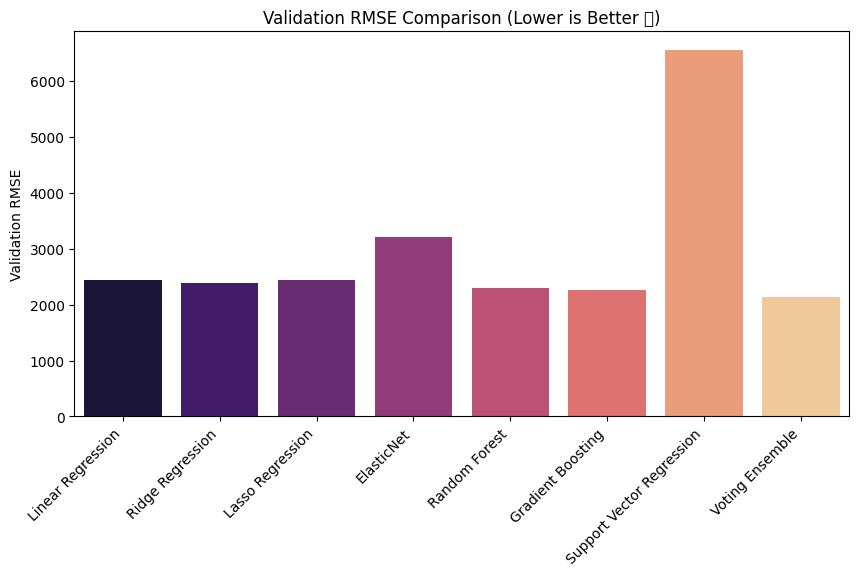

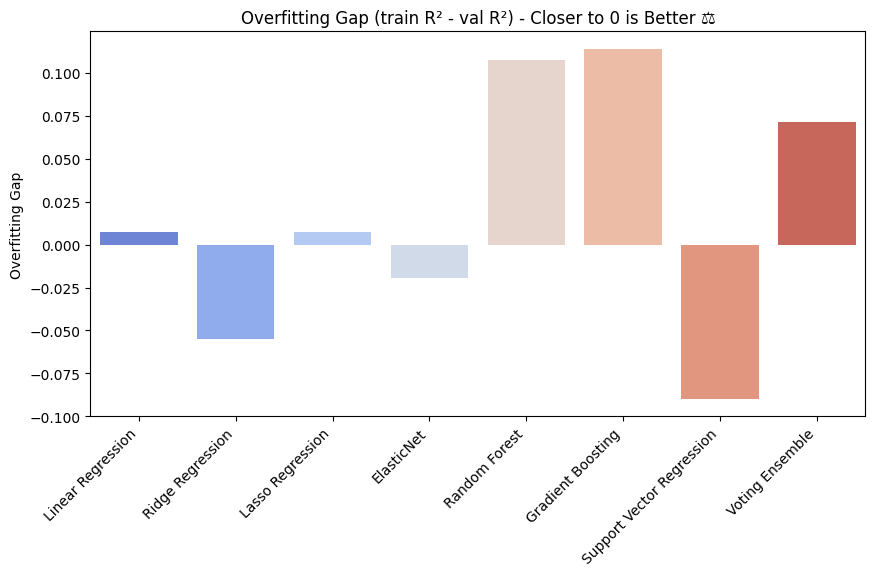

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===========================
# 1️⃣ Convert results dict to DataFrame
# ===========================
metrics_df = pd.DataFrame(results).T  # transpose so models are rows
metrics_df = metrics_df[['val_r2', 'val_rmse', 'val_mae', 'overfitting_gap', 'cv_r2_mean']]
metrics_df = metrics_df.reset_index().rename(columns={'index': 'Model'})

print("📊 Model comparison table:")
display(metrics_df)

# ===========================
# 2️⃣ Plot Validation R² (Higher is better)
# ===========================
plt.figure(figsize=(10, 5))
sns.barplot(data=metrics_df, x='Model', y='val_r2', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Validation R² Comparison (Higher is Better ✅)')
plt.ylabel('Validation R²')
plt.xlabel('')
plt.ylim(0, 1)
plt.show()

# ===========================
# 3️⃣ Plot Validation RMSE (Lower is better)
# ===========================
plt.figure(figsize=(10, 5))
sns.barplot(data=metrics_df, x='Model', y='val_rmse', palette='magma')
plt.xticks(rotation=45, ha='right')
plt.title('Validation RMSE Comparison (Lower is Better ✅)')
plt.ylabel('Validation RMSE')
plt.xlabel('')
plt.show()

# ===========================
# 4️⃣ Plot Overfitting Gap (Closer to 0 is better)
# ===========================
plt.figure(figsize=(10, 5))
sns.barplot(data=metrics_df, x='Model', y='overfitting_gap', palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Overfitting Gap (train R² - val R²) - Closer to 0 is Better ⚖️')
plt.ylabel('Overfitting Gap')
plt.xlabel('')
plt.show()


📈 ADVANCED MODEL COMPARISON

🏆 MODEL PERFORMANCE RANKING
Model                     Val R²   CV R²        Overfitting  Time (s)  
--------------------------------------------------------------------------------
Voting Ensemble            0.8937  0.8640 ± 0.0466   ✅  0.0716      0.20
Gradient Boosting          0.8811  0.8551 ± 0.0581  ⚠️  0.1140      0.07
Random Forest              0.8776  0.8600 ± 0.0602  ⚠️  0.1077      0.14
Ridge Regression           0.8672  0.7630 ± 0.0160   ✅ -0.0550      0.00
Lasso Regression           0.8613  0.8325 ± 0.0362   ✅  0.0073      0.00
Linear Regression          0.8610  0.8339 ± 0.0342   ✅  0.0076      0.01
ElasticNet                 0.7611  0.7181 ± 0.0206   ✅ -0.0195      0.00
Support Vector Regression  0.0028 -0.1031 ± 0.0835   ✅ -0.0899      0.00


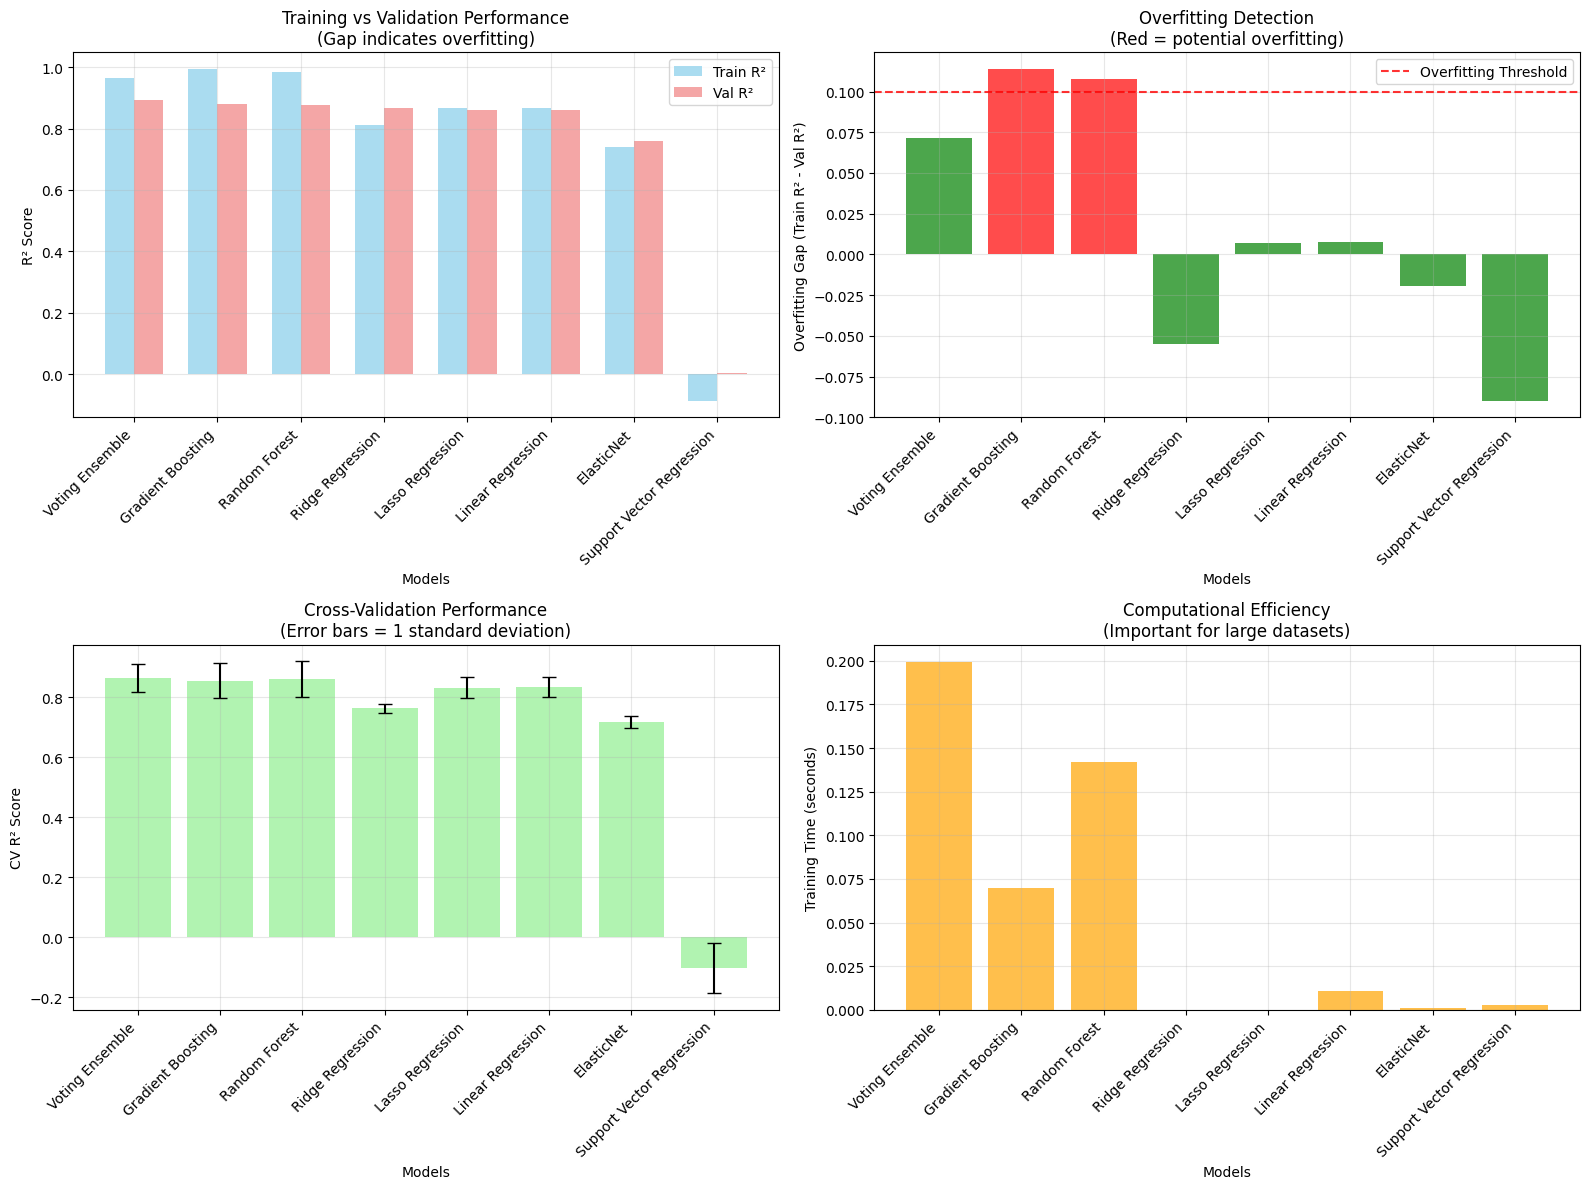


🎯 BEST MODEL SELECTED: Voting Ensemble
📊 Validation R²: 0.8937
🔍 CV R²: 0.8640 ± 0.0466

💡 INTERPRETATION GUIDE:
• Good: High R², small train-val gap, stable CV, reasonable training time
• Overfitting: Large gap between train and validation performance
• Unstable: Large CV standard deviation
• Best choice: Balances performance, stability, and efficiency


In [74]:
# 📈 CELL 7: Advanced Model Comparison Visualization
print("📈 ADVANCED MODEL COMPARISON")

# Create comprehensive results dataframe
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('val_r2', ascending=False)

print("\n" + "=" * 80)
print("🏆 MODEL PERFORMANCE RANKING")
print("=" * 80)
print(f"{'Model':<25} {'Val R²':<8} {'CV R²':<12} {'Overfitting':<12} {'Time (s)':<10}")
print("-" * 80)

for model_name in results_df.index:
    row = results_df.loc[model_name]
    overfitting_indicator = "⚠️" if row['overfitting_gap'] > 0.1 else "✅"
    print(f"{model_name:<25} {row['val_r2']:>7.4f} {row['cv_r2_mean']:>7.4f} ± {row['cv_r2_std']:>5.4f} "
          f"{overfitting_indicator:>3} {row['overfitting_gap']:>7.4f} {row['training_time']:>9.2f}")

# Comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. R² Comparison
models_ordered = results_df.index
val_r2 = [results[model]['val_r2'] for model in models_ordered]
train_r2 = [results[model]['train_r2'] for model in models_ordered]

x = np.arange(len(models_ordered))
width = 0.35

axes[0, 0].bar(x - width/2, train_r2, width, label='Train R²', alpha=0.7, color='skyblue')
axes[0, 0].bar(x + width/2, val_r2, width, label='Val R²', alpha=0.7, color='lightcoral')
axes[0, 0].set_xlabel('Models')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_title('Training vs Validation Performance\n(Gap indicates overfitting)')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(models_ordered, rotation=45, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Overfitting Analysis
overfitting_gaps = [results[model]['overfitting_gap'] for model in models_ordered]
colors = ['red' if gap > 0.1 else 'green' for gap in overfitting_gaps]
axes[0, 1].bar(models_ordered, overfitting_gaps, color=colors, alpha=0.7)
axes[0, 1].axhline(y=0.1, color='red', linestyle='--', alpha=0.8, label='Overfitting Threshold')
axes[0, 1].set_xlabel('Models')
axes[0, 1].set_ylabel('Overfitting Gap (Train R² - Val R²)')
axes[0, 1].set_title('Overfitting Detection\n(Red = potential overfitting)')
axes[0, 1].set_xticklabels(models_ordered, rotation=45, ha='right')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Cross-Validation Stability
cv_means = [results[model]['cv_r2_mean'] for model in models_ordered]
cv_stds = [results[model]['cv_r2_std'] for model in models_ordered]
axes[1, 0].bar(models_ordered, cv_means, yerr=cv_stds, capsize=5, alpha=0.7, color='lightgreen')
axes[1, 0].set_xlabel('Models')
axes[1, 0].set_ylabel('CV R² Score')
axes[1, 0].set_title('Cross-Validation Performance\n(Error bars = 1 standard deviation)')
axes[1, 0].set_xticklabels(models_ordered, rotation=45, ha='right')
axes[1, 0].grid(True, alpha=0.3)

# 4. Computational Efficiency
training_times = [results[model]['training_time'] for model in models_ordered]
axes[1, 1].bar(models_ordered, training_times, alpha=0.7, color='orange')
axes[1, 1].set_xlabel('Models')
axes[1, 1].set_ylabel('Training Time (seconds)')
axes[1, 1].set_title('Computational Efficiency\n(Important for large datasets)')
axes[1, 1].set_xticklabels(models_ordered, rotation=45, ha='right')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Select best model
best_model_name = results_df.index[0]
best_model = trained_models[best_model_name]
print(f"\n🎯 BEST MODEL SELECTED: {best_model_name}")
print(f"📊 Validation R²: {results_df.iloc[0]['val_r2']:.4f}")
print(f"🔍 CV R²: {results_df.iloc[0]['cv_r2_mean']:.4f} ± {results_df.iloc[0]['cv_r2_std']:.4f}")

print("\n💡 INTERPRETATION GUIDE:")
print("• Good: High R², small train-val gap, stable CV, reasonable training time")
print("• Overfitting: Large gap between train and validation performance") 
print("• Unstable: Large CV standard deviation")
print("• Best choice: Balances performance, stability, and efficiency")

## ⚙️ Advanced Hyperparameter Optimization

Machine learning models have **hyperparameters**—settings that control how the model learns.  
Choosing the right hyperparameters can dramatically improve performance.

- **Default parameters** are rarely optimal.  
- **Systematic search** (like `RandomizedSearchCV`) explores different combinations efficiently.  
- **MLflow tracking** logs all experiments, making it easy to compare results.  

In this section, we will tune hyperparameters for several models:
- Random Forest
- Gradient Boosting
- Ridge Regression
- Voting Ensemble

> 🎯 Goal: Find the best configurations that maximize model performance while preventing overfitting.

In [75]:
# Define comprehensive hyperparameter grids
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200, 300],  # Number of trees
        'max_depth': [None, 10, 20, 30],       # Tree depth
        'min_samples_split': [2, 5, 10],       # Minimum samples to split
        'min_samples_leaf': [1, 2, 4],         # Minimum samples per leaf
        'max_features': ['auto', 'sqrt', 'log2']  # Features to consider for splits
    },
    
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],        # Number of boosting stages
        'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
        'max_depth': [3, 4, 5, 6],             # Maximum depth per tree
        'min_samples_split': [2, 5, 10],       # Minimum samples to split
        'subsample': [0.8, 0.9, 1.0]           # Fraction of samples for fitting
    },
    
    'Ridge Regression': {
        'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],  # Regularization strength
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Algorithm
    },
    
    'Voting Ensemble': {
        'ridge__alpha': [0.1, 1.0, 10.0],
        'rf__n_estimators': [50, 100],
        'rf__max_depth': [10, 20],
        'gb__n_estimators': [50, 100],
        'gb__learning_rate': [0.05, 0.1]
    }
} 

## 📝 Steps: Hyperparameter Optimization


In [47]:

# Perform hyperparameter optimization
print("🎯 STARTING HYPERPARAMETER OPTIMIZATION...")
tuned_models = {}
optimization_results = {}

for model_name in ['Random Forest', 'Gradient Boosting', 'Ridge Regression', 'Voting Ensemble']:
    print(f"\n🔧 Tuning {model_name}...")
    
    with mlflow.start_run(run_name=f"{model_name}_tuned"):
        # Use RandomizedSearchCV for efficient optimization
        search = RandomizedSearchCV(
            advanced_models[model_name],
            param_grids[model_name],
            n_iter=20,  # Try 20 random combinations (efficient!)
            cv=config.CV_FOLDS,
            scoring='r2',
            n_jobs=config.N_JOBS,
            random_state=config.RANDOM_STATE,
            verbose=1
        )
        
        # Perform the search
        search.fit(X_train, y_train)
        
        # Store results
        tuned_models[model_name] = search.best_estimator_
        optimization_results[model_name] = {
            'best_score': search.best_score_,
            'best_params': search.best_params_,
            'best_estimator': search.best_estimator_
        }
        
        # Log to MLflow
        mlflow.log_params(search.best_params_)
        mlflow.log_metric('best_cv_score', search.best_score_)
        mlflow.sklearn.log_model(search.best_estimator_, "tuned_model")
        
        print(f"✅ {model_name:20} | Best CV R²: {search.best_score_:.4f}")
        print(f"   Best parameters found: {search.best_params_}")

print(f"\n🎉 HYPERPARAMETER OPTIMIZATION COMPLETE!")
print(f"💡 All tuned models saved in MLflow for comparison")

🎯 STARTING HYPERPARAMETER OPTIMIZATION...

🔧 Tuning Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


2025/11/10 20:45:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/10 20:46:05 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/10 20:46:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Random Forest        | Best CV R²: 0.8640
   Best parameters found: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}

🔧 Tuning Gradient Boosting...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


2025/11/10 20:46:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/10 20:46:12 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/10 20:46:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Gradient Boosting    | Best CV R²: 0.8566
   Best parameters found: {'subsample': 0.8, 'n_estimators': 50, 'min_samples_split': 5, 'max_depth': 6, 'learning_rate': 0.2}

🔧 Tuning Ridge Regression...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


2025/11/10 20:46:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/10 20:46:18 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/10 20:46:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Ridge Regression     | Best CV R²: 0.8345
   Best parameters found: {'solver': 'svd', 'alpha': 0.01}

🔧 Tuning Voting Ensemble...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


2025/11/10 20:46:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/10 20:47:13 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.
2025/11/10 20:47:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Voting Ensemble      | Best CV R²: 0.8769
   Best parameters found: {'ridge__alpha': 0.1, 'rf__n_estimators': 50, 'rf__max_depth': 10, 'gb__n_estimators': 100, 'gb__learning_rate': 0.05}

🎉 HYPERPARAMETER OPTIMIZATION COMPLETE!
💡 All tuned models saved in MLflow for comparison


# A more sophisticated version of the previous visualization

Model                Untuned R²   Tuned R²     Improvement 
------------------------------------------------------------
Random Forest            0.8776     0.8881 📈   0.0105
Gradient Boosting        0.8811     0.8898 📈   0.0086
Ridge Regression         0.8672     0.8640 📉  -0.0032
Voting Ensemble          0.8937     0.8900 📉  -0.0037


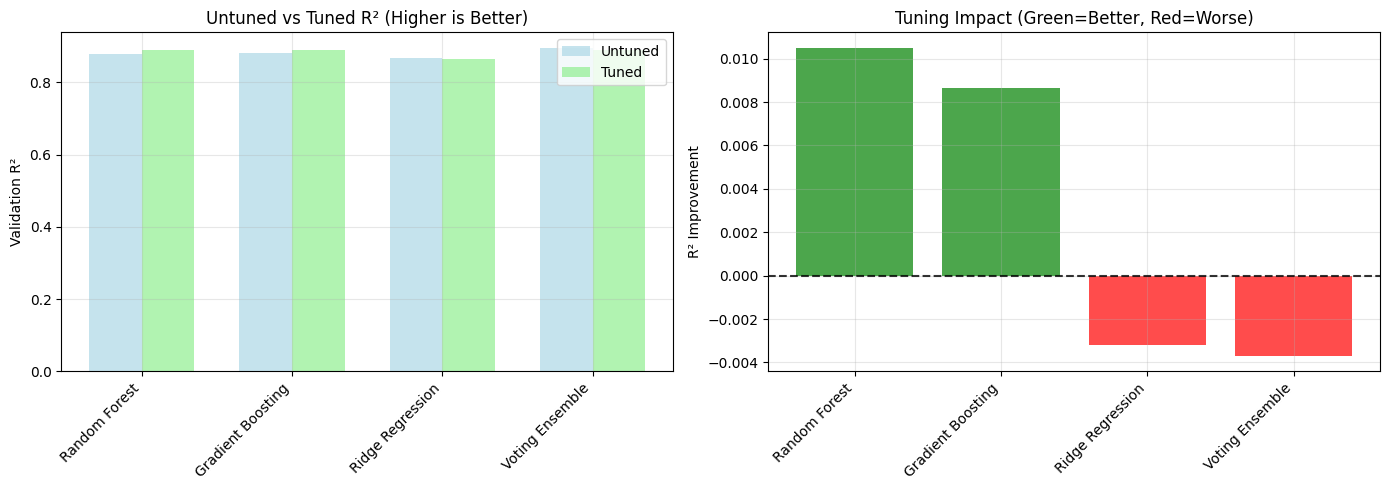


🏆 BEST TUNED MODEL: Voting Ensemble
📊 Validation R²: 0.8900
📈 Improvement over untuned: +-0.0037


In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

# ===========================
# 1️⃣ Evaluate tuned models on validation set
# ===========================
tuned_results = {}
for model_name, tuned_model in tuned_models.items():
    y_val_pred = tuned_model.predict(X_val)
    val_r2 = r2_score(y_val, y_val_pred)
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    improvement = val_r2 - results[model_name]['val_r2']  # vs untuned
    
    tuned_results[model_name] = {
        'val_r2': val_r2,
        'val_rmse': val_rmse,
        'improvement': improvement
    }

# ===========================
# 2️⃣ Print simple comparison table
# ===========================
print(f"{'Model':<20} {'Untuned R²':<12} {'Tuned R²':<12} {'Improvement':<12}")
print("-" * 60)
for model_name, res in tuned_results.items():
    untuned_r2 = results[model_name]['val_r2']
    tuned_r2 = res['val_r2']
    improvement = res['improvement']
    icon = "📈" if improvement > 0 else "📉" if improvement < 0 else "➡️"
    print(f"{model_name:<20} {untuned_r2:>10.4f} {tuned_r2:>10.4f} {icon} {improvement:>8.4f}")

# ===========================
# 3️⃣ Plot Tuned vs Untuned R²
# ===========================
models = list(tuned_results.keys())
untuned_r2 = [results[m]['val_r2'] for m in models]
tuned_r2 = [tuned_results[m]['val_r2'] for m in models]
improvement = [tuned_results[m]['improvement'] for m in models]

x = np.arange(len(models))
width = 0.35

fig, axes = plt.subplots(1, 2, figsize=(14,5))

# R² comparison
axes[0].bar(x - width/2, untuned_r2, width, label='Untuned', alpha=0.7, color='lightblue')
axes[0].bar(x + width/2, tuned_r2, width, label='Tuned', alpha=0.7, color='lightgreen')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models, rotation=45, ha='right')
axes[0].set_ylabel('Validation R²')
axes[0].set_title('Untuned vs Tuned R² (Higher is Better)')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Improvement plot
colors = ['green' if i>0 else 'red' for i in improvement]
axes[1].bar(models, improvement, color=colors, alpha=0.7)
axes[1].axhline(0, color='black', linestyle='--', alpha=0.8)
axes[1].set_ylabel('R² Improvement')
axes[1].set_title('Tuning Impact (Green=Better, Red=Worse)')
axes[1].set_xticklabels(models, rotation=45, ha='right')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ===========================
# 4️⃣ Best tuned model
# ===========================
best_model_name = max(tuned_results, key=lambda m: tuned_results[m]['val_r2'])
print(f"\n🏆 BEST TUNED MODEL: {best_model_name}")
print(f"📊 Validation R²: {tuned_results[best_model_name]['val_r2']:.4f}")
print(f"📈 Improvement over untuned: +{tuned_results[best_model_name]['improvement']:.4f}")


# ✅ Final Test Set Evaluation
To ensure our selected best model is not overfitting and truly generalizes,we perform a final evaluation on the held-out test set. 
This step provides an unbiased estimate of how the model will perform on unseen data, which is a standard and critical practice in machine learning before deploying a model to production.


In [77]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

best_tuned_model = tuned_models[best_model_name]

# Predict on test set
y_test_pred = best_tuned_model.predict(X_test)

# Compute performance metrics
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"📊 Test R²: {test_r2:.4f}")
print(f"📊 Test RMSE: {test_rmse:.4f}")
print(f"📊 Test MAE: {test_mae:.4f}")


📊 Test R²: 0.9392
📊 Test RMSE: 2191.1851
📊 Test MAE: 1639.7133


## 🎨 Using Gradio for Interactive Interfaces

In [66]:
import gradio as gr
import joblib # Necessary for loading the model
import numpy as np # Useful for data formatting

# ----------------------------------------------------
# 1. Model Loading and File Handling
# ----------------------------------------------------
MODEL_FILE = "car_price_model.pkl" 

try:
    # Attempt to load the trained pipeline
    poly_pipeline = joblib.load(MODEL_FILE)
    print(f"✅ Model loaded successfully from: {MODEL_FILE}")
except FileNotFoundError:
    print(f"❌ ERROR: The model file '{MODEL_FILE}' was not found. "
          f"Please ensure it is in the current directory.")
    # In a real application, you might raise an exception or exit here.
    poly_pipeline = None # Set to None to prevent crashing later

# ----------------------------------------------------
# 2. Prediction Function
# ----------------------------------------------------
# 🚨 IMPORTANT: The arguments MUST match the exact features and order used during training.
def predict_car_price(EngineSize, Horsepower, HighwayMPG, CurbWeight, CarLength, CarWidth, CarHeight):
    
    # Check if the model was loaded successfully
    if poly_pipeline is None:
        return "ERROR: Model not loaded. Check console for details."
    
    # Format the inputs into the required structure for the pipeline: [[feature1, feature2, ...]]
    features_data = [
        EngineSize, Horsepower, HighwayMPG, CurbWeight, 
        CarLength, CarWidth, CarHeight
    ]
    
    # Convert to a NumPy array for robust input handling by the pipeline
    X = np.array([features_data])
    
    # Get the prediction (predict returns an array, so we take the first element [0])
    predicted_price = poly_pipeline.predict(X)[0] 
    
    # Format the output as currency string
    return f"${predicted_price:,.2f}"


# ----------------------------------------------------
# 3. Predefined Examples
# ----------------------------------------------------
# Ensure these example values are within the reasonable range of your dataset
examples = [
    [150, 100, 30, 2500, 170, 66.0, 55.0],  # Average Sedan
    [250, 180, 22, 3500, 185, 70.5, 58.0],  # Sport/Performance Car
    [100, 70, 40, 2000, 160, 64.0, 52.0]   # Small Economy Car
]


# ----------------------------------------------------
# 4. Gradio Interface Definition
# ----------------------------------------------------
# 📌 Adjust the min/max values in the Sliders to match your data's actual range
iface = gr.Interface(
    fn=predict_car_price,
    inputs=[
        gr.Slider(60, 350, value=150, step=1, label="Engine Size (cc)"),
        gr.Slider(50, 300, value=100, step=1, label="Horsepower (hp)"),
        gr.Slider(15, 50, value=30, step=1, label="Highway MPG"),
        gr.Slider(1500, 5000, value=2500, step=50, label="Curb Weight (lbs)"),
        gr.Slider(140, 200, value=170, step=1, label="Car Length (in)"),
        gr.Slider(60, 80, value=66, step=0.1, label="Car Width (in)"),
        gr.Slider(50, 65, value=55, step=0.1, label="Car Height (in)"),
    ],
    outputs=gr.Textbox(label="Predicted Price ($)"),
    title="🚗 Car Price Prediction Model",
    description="Adjust the car specifications to predict the price based on your trained model pipeline.",
    examples=examples
)


# ----------------------------------------------------
# 5. Launch the Gradio App
# ----------------------------------------------------
iface.launch(share=True)

❌ ERROR: The model file 'car_price_model.pkl' was not found. Please ensure it is in the current directory.
* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://d740e0d0d28c111b53.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
